Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


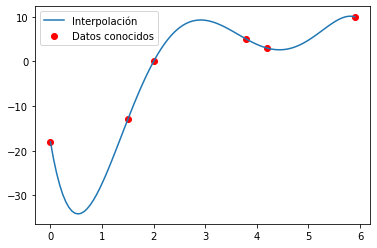

In [24]:
!pip install wget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import os
import wget

# Descargar datos
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Interpolacion.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
Path_ = wget.download(url,file)
Data = pd.read_csv(Path_)

# Convertir datos a arrays numpy
X = np.array(Data.X)
Y = np.array(Data.Y)

# Esta función calcula la matrzi de diferencias finitas dividad progresivas, que son las que se necesitan cuan los datos no están equiespaciados
def newton_divided_differences(x, y):
    n = len(x)
    divided_diffs = np.zeros((n, n))
    divided_diffs[:, 0] = y
    for j in range(1, n):
        for i in range(j, n):
            divided_diffs[i, j] = (divided_diffs[i, j - 1] - divided_diffs[i - 1, j - 1]) / (x[i] - x[i - j])
    return divided_diffs.diagonal()


# Esta es la funcón que implementa la interpolacion de Newton - Gregory
def newton_interpolation(x, y, x_interp):
    n = len(x)
    fdd = newton_divided_differences(x, y)
    p = np.zeros(len(x_interp))
    for i, x_int in enumerate(x_interp):
        p[i] = fdd[0]
        for j in range(1, n):
            p[i] += fdd[j] * np.prod(x_int - x[:j])
    return p

# Graficar resultados
x_interp = np.linspace(X[0], X[-1], 100)
y_interp = newton_interpolation(X, Y, x_interp)
plt.plot(x_interp, y_interp, label="Interpolación")
plt.scatter(X, Y, color="red", label="Datos conocidos")
plt.legend()
plt.show()
